1 Init and Import 

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import os

# Définir le backend souhaité (par exemple, 'tensorflow' ou 'theano')
backend = 'torch'  # Remplacez 'tensorflow' par le backend de votre choix

# Définir la variable d'environnement KERAS_BACKEND
os.environ['KERAS_BACKEND'] = backend

# Importer Keras après avoir défini la variable d'environnement
import keras




In [10]:
import PIL
from PIL import Image

In [11]:
from keras.datasets import mnist


In [5]:
## 1.2 Parameters

In [12]:
# filesystem
Data_dir="/home/onyxia/work/AutoEncoder/Data"
Codes_dir="/home/onyxia/work/AutoEncoder/Codes"
Outputs_dir="/home/onyxia/work/AutoEncoder/Outputs"

# Preprocessing 

# Model

# 2 Data Loading

In [13]:
def get_mnist_image(num_samples=3000):
    # Nombre de données à charger
    num_samples = 3000  # Par exemple, charger 1000 échantillons

    # Charger les données MNIST
    (_, _) , (image_data, image_labesl) = mnist.load_data()

     # Afficher la forme des données
    print("image_data shape:", image_data.shape)
    print("image_data shape:", image_labesl.shape)

    return image_data, image_labesl


In [14]:
image_data, image_labesl=get_mnist_image()

image_data shape: (10000, 28, 28)
image_data shape: (10000,)


In [9]:
n,k_x,k_y =image_data.shape
print("notre jeu de données contient ", n, "images", k_x, "*",k_y,"pixels")

notre jeu de données contient  10000 images 28 * 28 pixels


In [15]:
def get_real_image(image_data):
    images_real = []
    for img_matrix in image_data:
        img = Image.fromarray(img_matrix)
        images_real.append(np.array(img))

    return images_real

In [16]:
test_images_real=get_real_image(image_data)

# 2.2 Afficher des images 

In [17]:
def show_image(index_images,images=test_images_real,figsize=(10,5),image_labesl=image_labesl):
    n=len(index_images) # n=num_images_to_show
    plt.figure(figsize=figsize)
    for i in range(n):
         plt.subplot(1, n, i + 1)
         plt.imshow(images[index_images[i]], cmap='gray')
         plt.title(f"Label: {image_labesl[index_images[i]]}")
         plt.axis('off')
    plt.show()

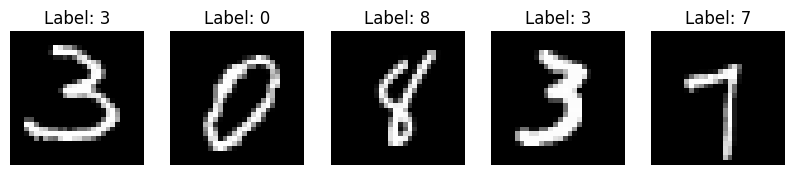

In [18]:
k=5    # on veut afficher k images"
some_indexes=np.random.permutation(range(n))[0:k]
some_indexes
show_image(some_indexes)

# ADD NOISy

In [19]:
# pip install scikit-image

from skimage import io 
from skimage.util import random_noise

In [20]:
def add_noise(images_data):
    new_data=np.copy(images_data)
    for i ,image in enumerate(images_data):
        # ajout du bruit gaussian
        image=random_noise(image,mode="gaussian",mean=0,var=1)
        image=random_noise(image,mode="s&p",amount=1,salt_vs_pepper=0.5)
        new_data[i]=image

    return new_data

In [21]:
noised_image=add_noise(test_images_real)

In [54]:
type(noised_image)

numpy.ndarray

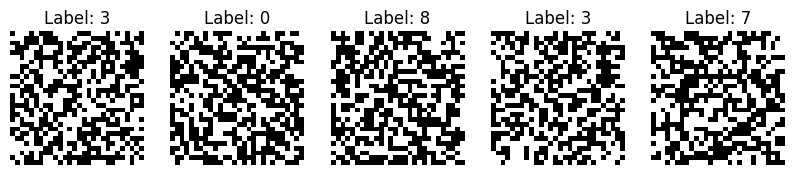

In [22]:
show_image(some_indexes,images=noised_image )

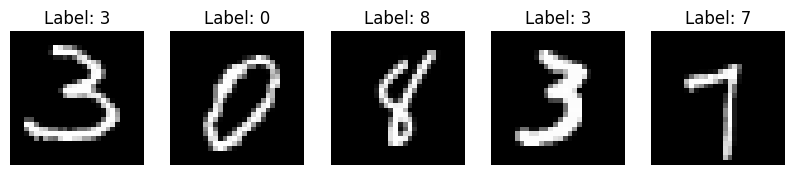

In [23]:
show_image(some_indexes)

# 5 SHUFFLE and Save our prepared datasheet

In [ ]:
5.1 SHUFLLE

In [24]:
import numpy as np
import random

In [25]:
def shuffle_split(noised_image,class_image,scale=0.2):
    n=noised_image.shape[0]
    test_size=int(n*scale)
    noised_image_random=np.copy(noised_image)
    class_image_random=np.copy(class_image)
    p=np.random.permutation(range(n))
    train_index,test_index=p[:n-test_size],p[n-test_size:]

    x_train,y_train=noised_image_random[train_index],class_image_random[train_index]
    x_test,y_test=noised_image_random[test_index],class_image_random[test_index]

    return (x_train,y_train),(x_train,y_train)

In [26]:
shuffle_split(np.array([1,2,3,5,6]),np.array([1,1,1,0,0]))

((array([6, 1, 5, 2]), array([0, 1, 0, 1])),
 (array([6, 1, 5, 2]), array([0, 1, 0, 1])))

In [54]:
(x_train,y_train),(x_test,y_test)=shuffle_split(noised_image,image_labesl)

In [56]:
x_train.shape

(8000, 28, 28)

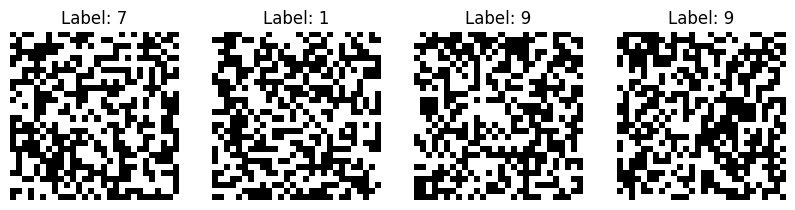

In [28]:
show_image([0,2,7,9],images=x_train)

In [ ]:
# Save Data


In [29]:
import h5py

In [40]:
def save_data(x_train,y_train,x_test,y_test,data_filename):
    with h5py.File(Data_dir+"/"+data_filename, 'w') as f:
    # Créer un dataset
       f.create_dataset('x_train', data=x_train)
       f.create_dataset('y_train', data=y_train)
       f.create_dataset('x_test', data=x_test)
       f.create_dataset('y_test', data=x_train)


In [57]:
save_data(x_train,y_train,x_test,y_test,"dataset_Images.h5")

In [50]:
def retrieve_data(filename) :
    with h5py.File(Data_dir+"/"+filename, 'r') as f:
    # Créer un dataset
       x_train=  f['x_train'][:] 
       y_train=  f['y_train'][:] 
       x_test=  f['x_test'][:] 
       y_test=  f['y_test'][:] 

    return x_train,y_train,x_test,y_test